<a href="https://colab.research.google.com/github/pragyapragati/suicide-rate/blob/master/suicideRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

In [0]:
uploaded = files.upload()

Saving master.csv to master (1).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "master.csv" with length 2706377 bytes


In [0]:
uploaded

{'master.csv': b'\xef\xbb\xbfcountry,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year, gdp_for_year ($) ,gdp_per_capita ($),generation\r\nAlbania,1987,male,15-24 years,21,312900,6.71,Albania1987,,"2,156,624,900",796,Generation X\r\nAlbania,1987,male,35-54 years,16,308000,5.19,Albania1987,,"2,156,624,900",796,Silent\r\nAlbania,1987,female,15-24 years,14,289700,4.83,Albania1987,,"2,156,624,900",796,Generation X\r\nAlbania,1987,male,75+ years,1,21800,4.59,Albania1987,,"2,156,624,900",796,G.I. Generation\r\nAlbania,1987,male,25-34 years,9,274300,3.28,Albania1987,,"2,156,624,900",796,Boomers\r\nAlbania,1987,female,75+ years,1,35600,2.81,Albania1987,,"2,156,624,900",796,G.I. Generation\r\nAlbania,1987,female,35-54 years,6,278800,2.15,Albania1987,,"2,156,624,900",796,Silent\r\nAlbania,1987,female,25-34 years,4,257200,1.56,Albania1987,,"2,156,624,900",796,Boomers\r\nAlbania,1987,male,55-74 years,1,137500,0.73,Albania1987,,"2,156,624,900",796,G.I. Generation\r\nAl

In [0]:
import io


In [0]:
df1 = pd.read_csv(io.StringIO(uploaded['master.csv'].decode('utf-8')))
print(df1)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
5         Albania  1987  female    75+ years            1       35600   
6         Albania  1987  female  35-54 years            6      278800   
7         Albania  1987  female  25-34 years            4      257200   
8         Albania  1987    male  55-74 years            1      137500   
9         Albania  1987  female   5-14 years            0      311000   
10        Albania  1987  female  55-74 years            0      144600   
11        Albania  1987    male   5-14 years            0      338200   
12        Albania  1988  female    75+ years       

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing

In [0]:
df1.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

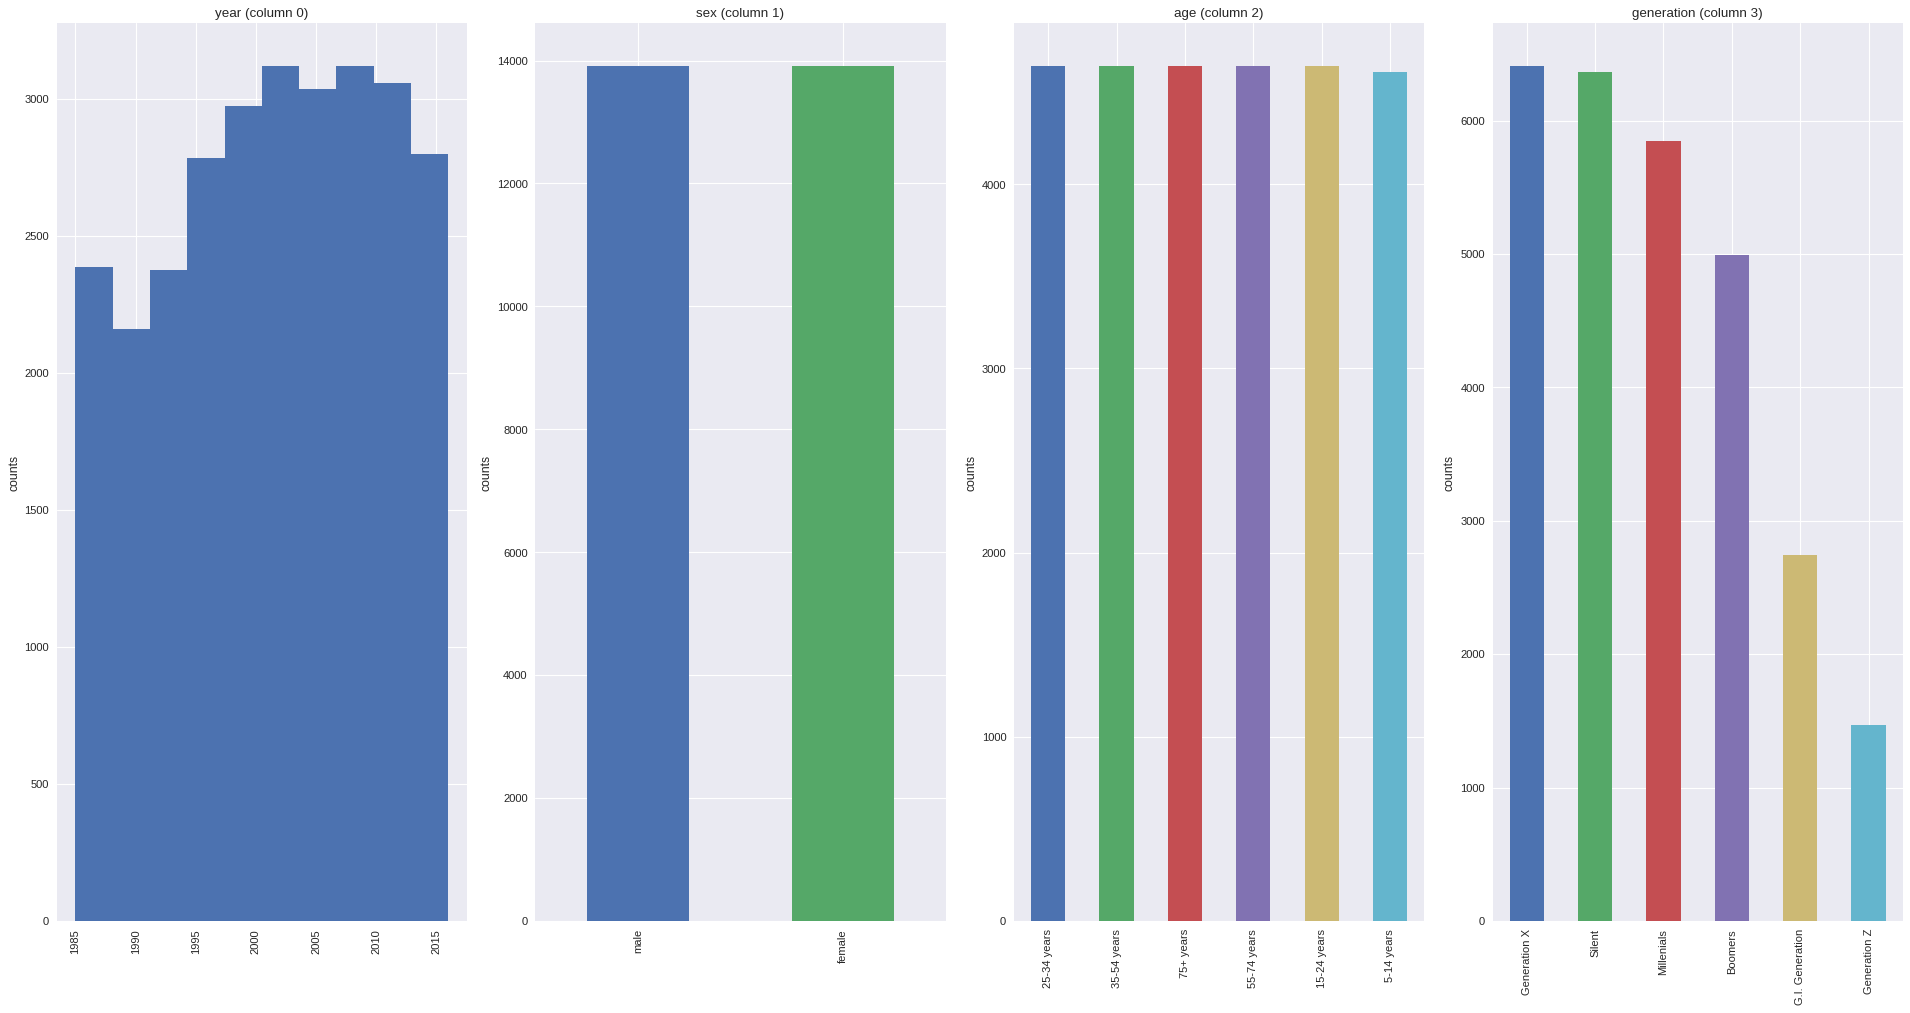

In [0]:
plotPerColumnDistribution(df1, 10, 5)

NameError: ignored

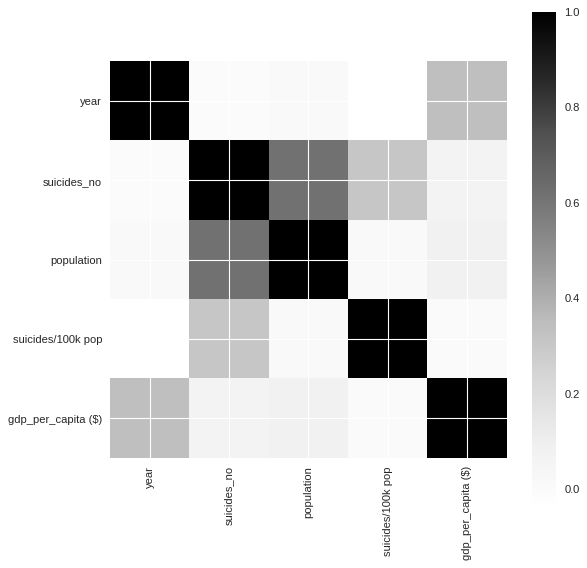

In [0]:
plotCorrelationMatrix(df1, 8)

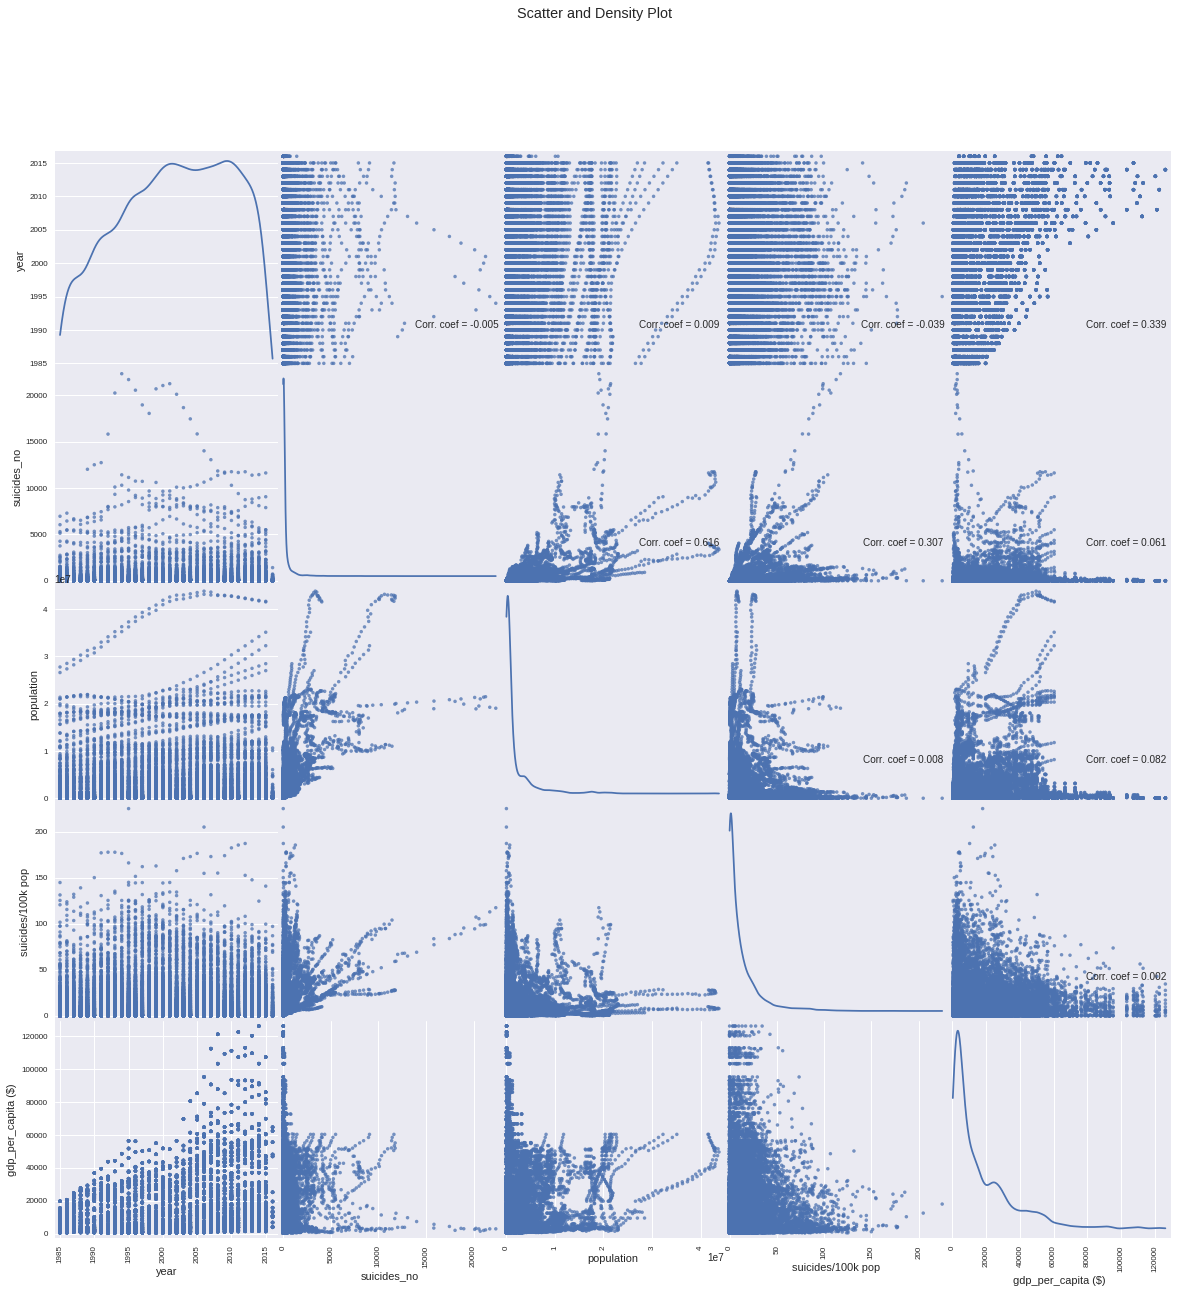

In [0]:
plotScatterMatrix(df1, 20, 10)